<font color=#000000 size=5 face="微軟正黑體">Load traindata and print content in traindata. </font>

In [1]:
import numpy as np
train = np.genfromtxt("train.csv",dtype='str', encoding='UTF-8', delimiter=",")
train

array([['Id', 'MSSubClass', 'MSZoning', ..., 'SaleType', 'SaleCondition',
        'SalePrice'],
       ['1', '60', 'RL', ..., 'WD', 'Normal', '208500'],
       ['2', '20', 'RL', ..., 'WD', 'Normal', '181500'],
       ...,
       ['1458', '70', 'RL', ..., 'WD', 'Normal', '266500'],
       ['1459', '20', 'RL', ..., 'WD', 'Normal', '142125'],
       ['1460', '20', 'RL', ..., 'WD', 'Normal', '147500']], dtype='<U13')

<font color=#000000 size=5 face="微軟正黑體">Take head and feature from train </font>

In [2]:
head = train[:1,1:-1]
train_data = np.array(train[1:,1:-1])
priece = train[1:,-1:].astype(np.float)

<font color=#000000 size=5 face="微軟正黑體">Information of train_data </font>

In [3]:
print('num of train_data:%d'%train_data.shape[0])
print('num of feature:%d'%train_data.shape[1])

num of train_data:1460
num of feature:79


<font color=#000000 size=5 face="微軟正黑體">Information of test_data </font>

In [4]:
test = np.genfromtxt("test.csv",dtype='str', encoding='UTF-8', delimiter=",")
test_head = test[:1,1:]
test_data = np.array(test[1:,1:])
print('num of train_data:%d'%test_data.shape[0])
print('num of feature:%d'%test_data.shape[1])

num of train_data:1459
num of feature:79


<font color=#000000 size=7 face="微軟正黑體">Data preprocessing</font>  
<br>
<font color=#000000 size=5 face="微軟正黑體">Merge train and test to confirm that the normalize mode is consistent.</font>
<br>
<font color=#000000 size=5 face="微軟正黑體">Set NA vlaue to 0, </font>


In [5]:
feature = np.vstack((train_data,test_data))# train_data:0-1459, test_data:1459-2918
for i in range(len(feature)):
    for j in range (len(feature[i])):
        if feature[i,j]=='NA':
            feature[i,j]= '0'
head_transpose = np.transpose(head)
feature_transpose= np.transpose(feature)
print(feature.shape)

(2919, 79)


<font color=#000000 size=5 face="微軟正黑體">One hot encoding </font>

In [6]:
from sklearn.preprocessing import LabelEncoder
list=[]
data_normalize = np.zeros((0,2919))
one_hot_encoding=LabelEncoder()

for i in range(len(head_transpose)):
    if (head_transpose[i]=='MSZoning'or head_transpose[i]=='Street'or head_transpose[i]=='Alley'
        or head_transpose[i]=='LotShape'or head_transpose[i]=='LandContour'or head_transpose[i]=='Utilities'
        or head_transpose[i]=='LotConfig'or head_transpose[i]=='LandSlope'or head_transpose[i]=='Neighborhood'
        or head_transpose[i]=='Condition1'or head_transpose[i]=='Condition2'or head_transpose[i]=='BldgType'
        or head_transpose[i]=='HouseStyle'or head_transpose[i]=='RoofStyle'or head_transpose[i]=='RoofMatl'
        or head_transpose[i]=='Exterior1st'or head_transpose[i]=='Exterior2nd'or head_transpose[i]=='MasVnrType'
        or head_transpose[i]=='ExterQual'or head_transpose[i]=='ExterCond'or head_transpose[i]=='Foundation'
        or head_transpose[i]=='BsmtQual'or head_transpose[i]=='BsmtCond'or head_transpose[i]=='BsmtExposure'
        or head_transpose[i]=='BsmtFinType1'or head_transpose[i]=='BsmtFinType2'or head_transpose[i]=='Heating'
        or head_transpose[i]=='HeatingQC'or head_transpose[i]=='CentralAir'or head_transpose[i]=='Electrical'
        or head_transpose[i]=='KitchenQual'or head_transpose[i]=='Functional'or head_transpose[i]=='FireplaceQu'
        or head_transpose[i]=='GarageType'or head_transpose[i]=='GarageFinish'or head_transpose[i]=='GarageQual'
        or head_transpose[i]=='GarageCond'or head_transpose[i]=='PavedDrive'or head_transpose[i]=='PoolQC'
        or head_transpose[i]=='Fence'or head_transpose[i]=='MiscFeature'or head_transpose[i]=='SaleType'
        or head_transpose[i]=='SaleCondition'or head_transpose[i]=='GarageYrBlt'or head_transpose[i]=='YrSold'
        or head_transpose[i]=='YearBuilt'or head_transpose[i]=='YearRemodAdd'or head_transpose[i]=='YearRemodAdd'):
        one_hot_encoding.fit(feature_transpose[i])
        list.append(one_hot_encoding.transform(feature_transpose[i]))
    else:
        list.append(feature_transpose[i])

for i in range(len(list)):
    data_normalize = np.vstack((data_normalize,list[i]))
data_normalize = np.transpose(data_normalize)
data_normalize.astype(np.float)

array([[ 60.,   4.,  65., ...,   2.,   9.,   4.],
       [ 20.,   4.,  80., ...,   1.,   9.,   4.],
       [ 60.,   4.,  68., ...,   2.,   9.,   4.],
       ...,
       [ 20.,   4., 160., ...,   0.,   9.,   0.],
       [ 85.,   4.,  62., ...,   0.,   9.,   4.],
       [ 60.,   4.,  74., ...,   0.,   9.,   4.]])

<font color=#000000 size=5 face="微軟正黑體">Minmax scale,bound the value in range[0,1]</font>

In [7]:
from sklearn import preprocessing
data_normalize = preprocessing.minmax_scale(data_normalize)

c:\users\boin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype <U32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


<font color=#000000 size=5 face="微軟正黑體">Dimension Reduction by PCA</font>

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
data_reduct = pca.fit_transform(data_normalize)
print(data_reduct.shape)

(2919, 79)


<font color=#000000 size=5 face="微軟正黑體">Split train_data,test_data from normalized data</font>

In [9]:
#split train_data,test_data
train_feature = data_reduct[:1460]
test_feature = data_reduct[1460:]
print(train_feature.shape)
print(test_feature.shape)

(1460, 79)
(1459, 79)


<font color=#000000 size=5 face="微軟正黑體">Split train_data, 80% for train and 20% for test</font>

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(train_feature,
        priece, test_size= 0.2, random_state= 42, shuffle= True)

<font color=#000000 size=5 face="微軟正黑體">Lasso Regression</font>

In [11]:
from sklearn.linear_model import Lasso
laso = Lasso(alpha=0.1)
laso.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

<font color=#000000 size=5 face="微軟正黑體">Prediction</font>

In [12]:
print(laso.predict(x_test).astype(np.int))

[ 150142  326496  107629  172038  318471   75541  229026  136593   74135
  157213  141868  106329   91751  206635  162934  136756  206863  124063
  113629  229698  133476  207867  185216  120663  211749  160237  202273
   82397  167999  195599  162010  262684  207610  101150  260956  152443
  123128  212419  287471   94404  103467  251059  106901  329687  128901
  155126   93472  132343  399569  132824  112261  222270  105443  335896
  159493  248442  212105  169675  124657  102401   17347  164404  299391
  265440  284404  203012  103280  313715  107812  179458  111021  119637
   95798   60296  437212  184510  282639  290413  135929  113819  126477
   53977  117447  110886  158630  132305  264463  206167  148722  197551
  139168  122237  122624  269882  117517  187441  189594  189310  213593
  282211  188735  217540  308769  128632  197464  179050  163829  246174
  132079  231796   32650  125291  141668  131129  221143  118817   99485
  110139  143999  273870  132662  155625  176982  1

<font color=#000000 size=5 face="微軟正黑體">Visualization</font>

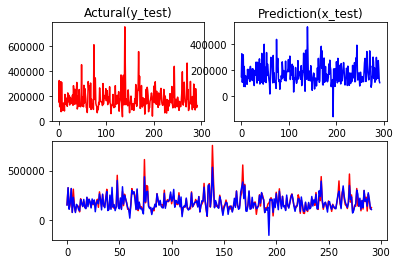

In [14]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.title('Actural(y_test)')
plt.plot(y_test,color='red')
plt.subplot(222)
plt.title('Prediction(x_test)')
plt.plot(laso.predict(x_test),color='blue')
plt.subplot(212)
plt.plot(y_test,color='red')
plt.plot(laso.predict(x_test),color='blue')

<font color=#000000 size=5 face="微軟正黑體">Train all train_data and predict test_feature</font>

In [15]:
laso.fit(train_feature,priece)
prediction=laso.predict(test_feature)
prediction = np.array(['{:.1f}'.format(i) for i in prediction])
print('Prediction(test_feature)')
print(prediction)

Prediction(test_feature)
['113835.4' '162521.1' '168137.2' ... '157676.5' '127904.3' '243292.4']


<font color=#000000 size=5 face="微軟正黑體">Save result to csv file</font>

In [16]:
submission=[]
index=[]
for i in range(len(prediction)):
    index.append(i+1461)
    submission.append(prediction[i])
index=np.array(index)
submission=np.array(submission)
print(index)
print(submission)
np.savetxt('submission.csv', np.column_stack((index,submission)), fmt='%s', delimiter = ',',header=('Id,SalePrice'),comments='')

[1461 1462 1463 ... 2917 2918 2919]
['113835.4' '162521.1' '168137.2' ... '157676.5' '127904.3' '243292.4']


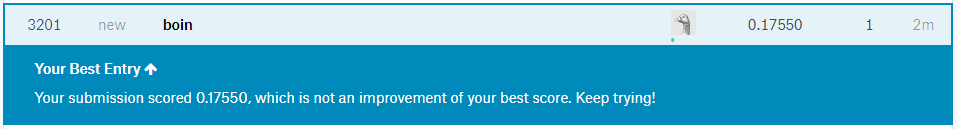